In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import scikit_posthocs as sp

import warnings
warnings.filterwarnings("ignore")

# Plot Functions

In [10]:
margin_left = 0.05
margin_right= 0.99
margin_top = 0.99
margin_bottom = .24 # .23
plt_width = 52 # 38
plt_heigth = 24 # 18
plot_rotation = 75
axis_font_size = 56 # 50
labels_size = 60 # 60

def boxplotMae(sample, file=""):
    sample['error_rank'] = sample.groupby(['Dataset'], as_index=False )['MAE'].rank(method='average', ascending = True)

    order = sample.groupby('Method')['error_rank'].mean().sort_values().index

    palette = sns.color_palette('Spectral', sample['Method'].nunique())

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(plt_width,plt_heigth))
        plt.subplots_adjust(left=margin_left, bottom=margin_bottom, right=margin_right, top=margin_top)
        ax=sns.boxplot(data=sample, x='Method', y='error_rank', order = order, palette = palette)

        plt.xticks(rotation =plot_rotation ,fontsize = axis_font_size)
        plt.yticks(fontsize = axis_font_size)

        ax.set_xlabel("Quantifiers",fontsize=labels_size)
        ax.set_ylabel("Avg. ranking",fontsize=labels_size)

    plt.show()
    if file != "":
        ax.figure.savefig('./figs/'+file+ '.pdf', format="pdf", facecolor='w')

    return sample

def generateHistogram(optimal_df):
    df = optimal_df.drop('dataset', axis=1)
    x = [0] * len(df.columns)
    
    for i in range(len(optimal_df)):
        row = df.iloc[i]
        x[np.sum(row)-1] += 1

    bin_edges = np.arange(0.5, len(x) + 1.5)

    values = []
    for i in range(len(x)):
        values.extend([i + 1] * x[i])

    ax = sns.histplot(values, bins=bin_edges, kde=True)
    ax.set(xlabel='Number of quantifiers in Algorithm Optimal Set', ylabel='Number of datasets')

    plt.xticks(np.arange(1, len(x) + 1))

    plt.show()

    ax.figure.savefig('./figs/aoptset_histogram.pdf', format="pdf", facecolor='w')

    return x

# Plotting results

# Quantifiers Hit Rate

In [11]:
hit_rate_table = pd.read_csv('./plot_data/plot_tables/recommender_hit_rate_table.csv')
hit_rate_table

,Method,HitRate,Std
0,Top3+BASELINE,0.827068,0.378189
1,Top5+BASELINE,0.924812,0.263694
2,Top1,0.781955,0.412918
3,Top3,0.939850,0.237765
4,Top5,0.992481,0.086384
5,CC,0.210526,0.407682
6,ACC,0.421053,0.493728
7,PACC,0.270677,0.444309
8,PCC,0.142857,0.349927
9,SMM,0.691729,0.461779


In [12]:
# OLD_hit_rate_table = pd.read_csv('./recommender_hit_table/BKP/recommender_hit_rate_table.csv')

# # Drop the specified rows from the dataframe
# indexes_to_drop = [1, 2, 4, 5, 7, 8, 10, 11, 13, 14]
# OLD_hit_rate_table = OLD_hit_rate_table.drop(indexes_to_drop)

# indexes_to_replace = [0, 3, 6, 9, 12]  # Example indexes to replace
# new_values = ['Top1', 'Top3', 'Top5', 'Top3+W', 'Top5+W']  # New values for the 'Method' column

# for index, new_value in zip(indexes_to_replace, new_values):
#     OLD_hit_rate_table.loc[index, 'Method'] = new_value

# # Display the updated dataframe
# OLD_hit_rate_table.reset_index(drop=True, inplace=True)
# OLD_hit_rate_table

## Plotting Quantification Results

In [13]:
experiment_table_path = './plot_data/plot_tables/experiment_table.csv'

experiment_table = pd.read_csv(experiment_table_path)

experiment_table['Method'].unique()

array(['ACC', 'BASELINE+TOP3+MEAN', 'BASELINE+TOP3+MEDIAN',
       'BASELINE+TOP3+WEIGHTED', 'BASELINE+TOP5+MEAN',
       'BASELINE+TOP5+MEDIAN', 'BASELINE+TOP5+WEIGHTED', 'CC', 'DyS',
       'HDy', 'MAX', 'MS', 'PACC', 'PCC', 'SMM', 'SORD', 'TOP1',
       'TOP3+MEAN', 'TOP3+MEDIAN', 'TOP3+WEIGHTED', 'TOP5+MEAN',
       'TOP5+MEDIAN', 'TOP5+WEIGHTED', 'TOPLINE', 'X'], dtype=object)

In [14]:
experiment_table_path = './plot_data/plot_tables/experiment_table.csv'

final_experiment_table = pd.read_csv(experiment_table_path)

final_experiment_table.replace({
   "TOP1": "Top-1",
   "TOP3+MEDIAN": "Top-3",
   "TOP5+MEDIAN": "Top-5",
   "TOP3+WEIGHTED": "Top-3+W",
   "TOP5+WEIGHTED": "Top-5+W",
   "BASELINE+TOP3+MEDIAN": "(B) Top-3",
   "BASELINE+TOP5+MEDIAN": "(B) Top-5",
   "BASELINE+TOP3+WEIGHTED": "(B) Top-3+W",
   "BASELINE+TOP5+WEIGHTED": "(B) Top-5+W",

}, inplace=True)

query_final = "Method in ['ACC', 'CC', 'DyS', 'HDy', 'MAX', 'MS', 'PACC', 'PCC', 'SMM', 'SORD', 'Top-1', 'Top-3', 'Top-3+W', 'Top-5', 'Top-5+W', 'X', '(B) Top-3', '(B) Top-5', '(B) Top-3+W', '(B) Top-5+W']"

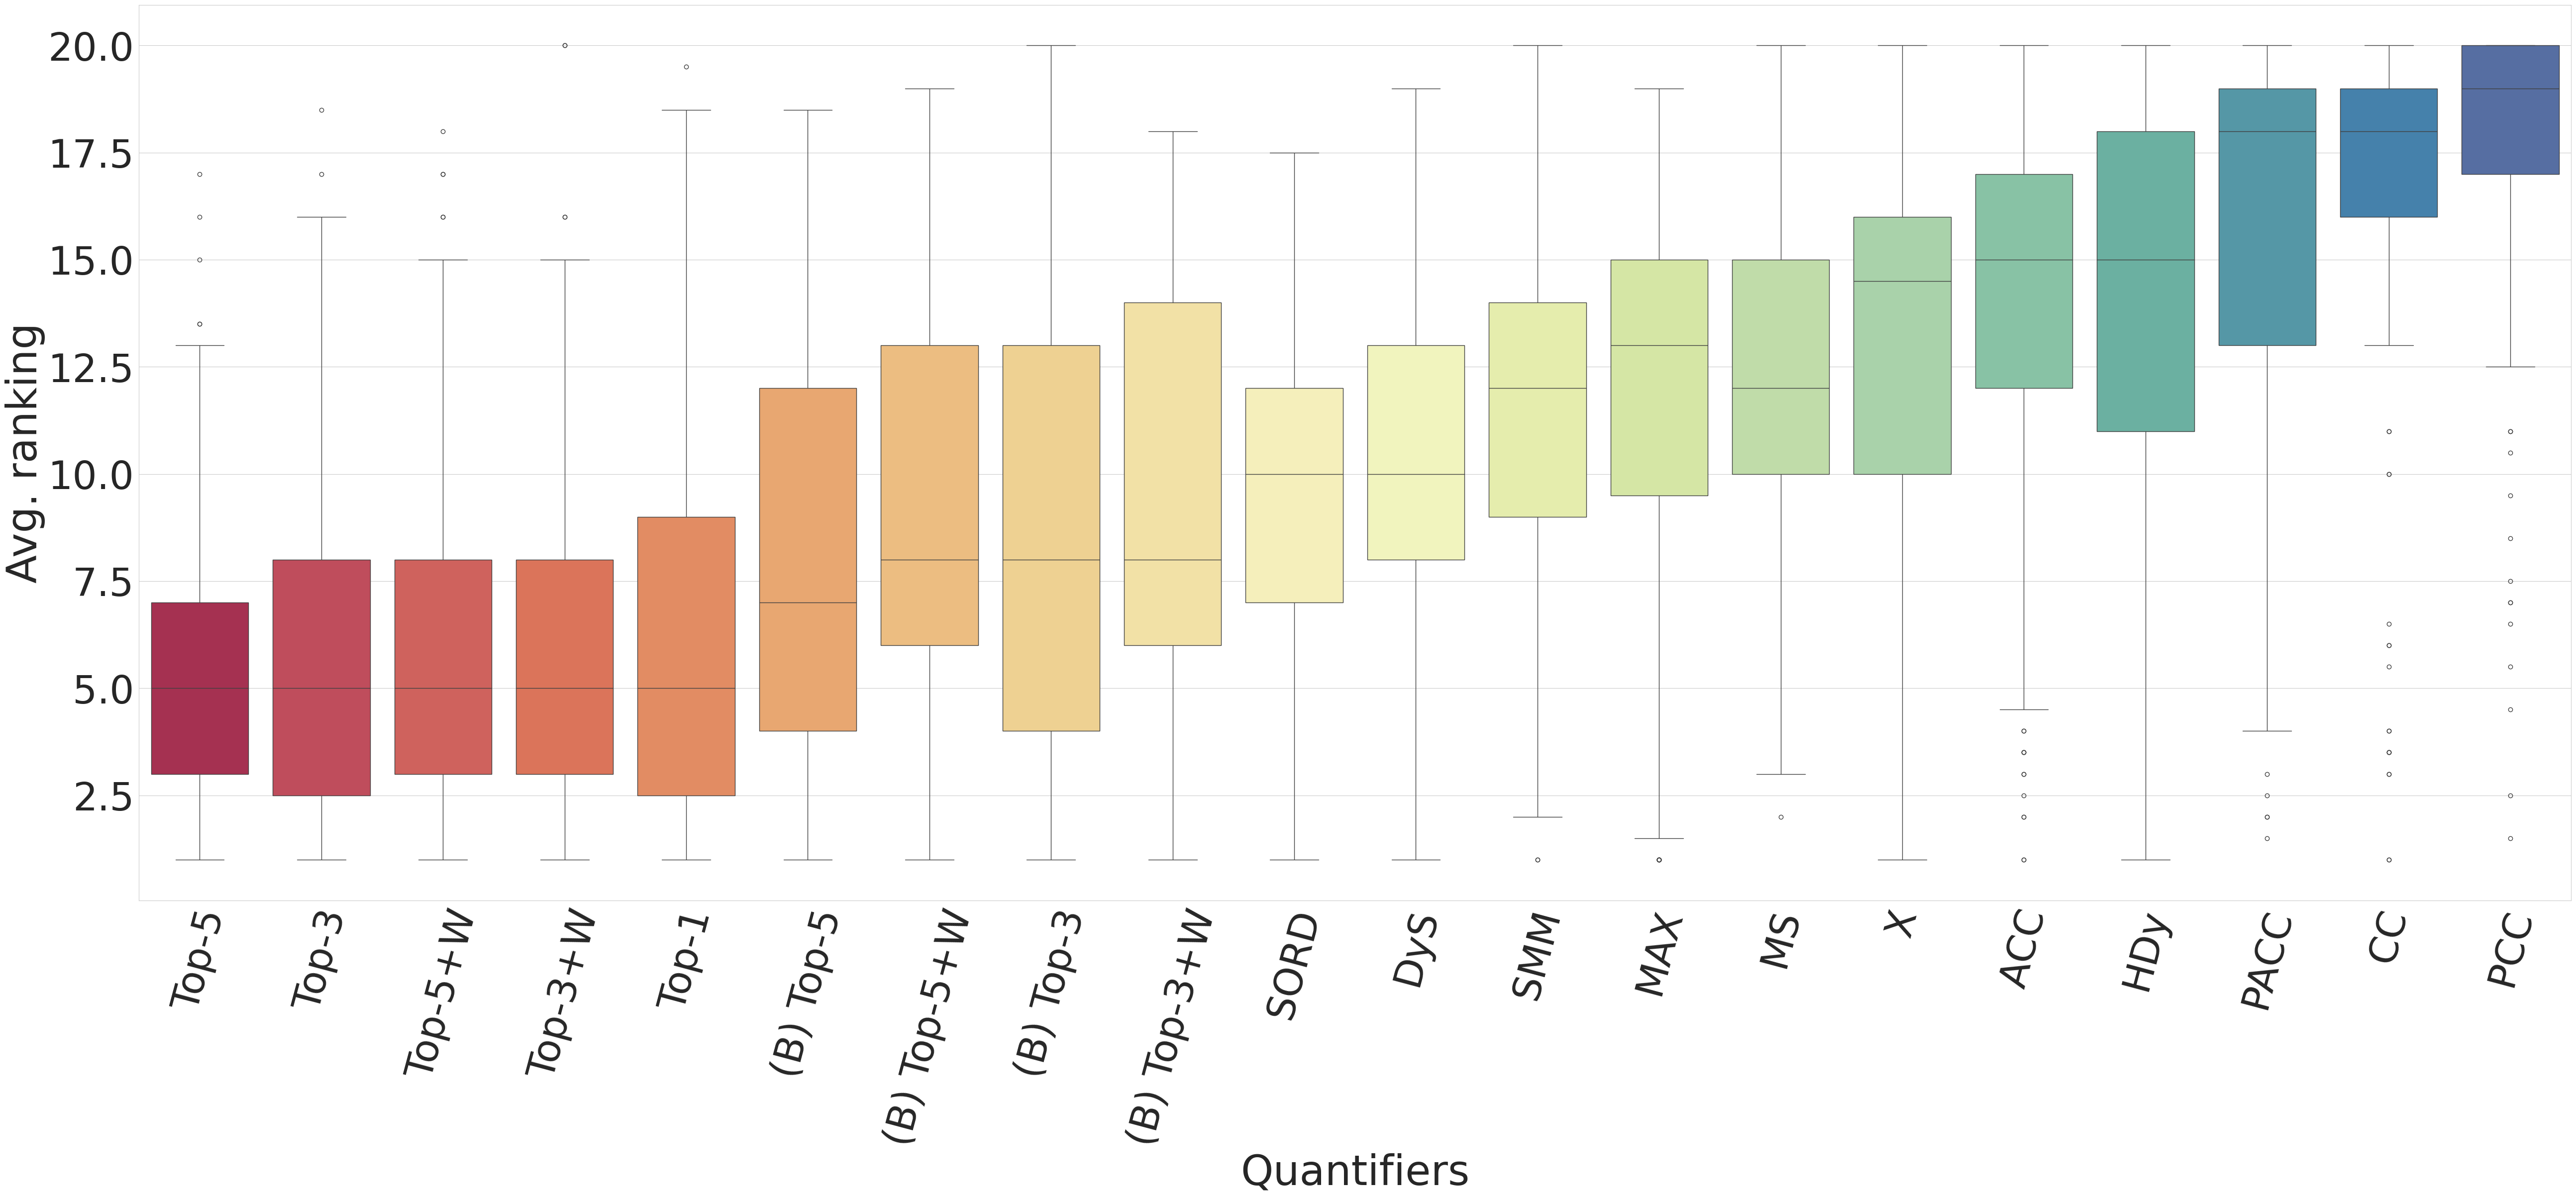

In [15]:
x= boxplotMae(final_experiment_table.query(query_final), 'boxall')

## Histogram of Quantifiers in ASetOpt (x) by Dataset (y)

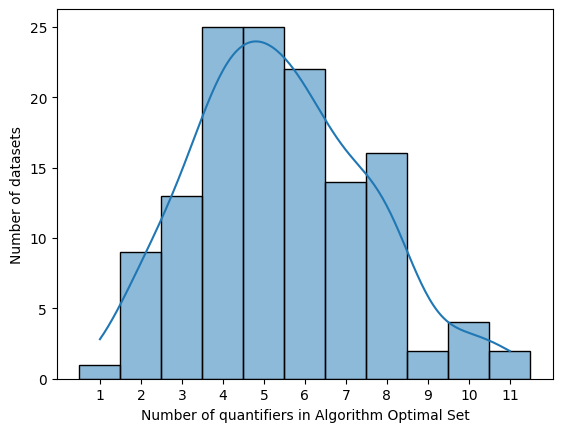

[1, 9, 13, 25, 25, 22, 14, 16, 2, 4, 2]


In [16]:
optimal_df = pd.read_csv('./plot_data/optimal_quantifiers.csv')
x = generateHistogram(optimal_df)

print(x)

# Final Statistical Test

In [ ]:
# Perform Conover post-hoc test
sig_matrix = sp.posthoc_conover_friedman(np.array(groups).T)

# Define the labels
labels = ['CC', 'ACC', 'PACC', 'PCC', 'SMM', 'HDy', 'DyS', 'SORD', 'MS', 'MAX', 'X']

# Create a DataFrame of the ranks
ranks = pd.DataFrame(groups, index=labels).T.rank(axis=1, ascending=True).mean(axis=0)

# Customize the diagram with black lines and a bold horizontal line
elbow_props = dict(color='black')
crossbar_props = dict(color='black', linewidth=2.5)  # Increase linewidth for boldness


# Create critical difference diagram with customized properties
fig, ax = plt.subplots()  # Create a new figure and axis
sp.critical_difference_diagram(ranks, sig_matrix, elbow_props=elbow_props, crossbar_props=crossbar_props)

# Save the plot as a PDF file
plt.savefig("critical_difference_diagram.pdf", format="pdf")

# Optionally, display the plot
plt.show()